In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler


from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [125]:
import pandas as pd
import numpy as np

# librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# librerías para crear el modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# para calcular las métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv("creditcardmarketing.csv")
df.head()

,1,No,Air Miles,Letter,High,1.1,No.1,High.1,2,1.2,4,No.2,1160.75,1669,877,1095,1002
0,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
1,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
2,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
3,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
4,6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0


In [3]:
nuevas_columnas = {
    "1" : "Customer_Number", 
    "No": "Offer_Accepted", 
    "Air Miles": "Reward", 
    "Letter": "Mailer_Type", 
    "High": "Income_Level",
    "1.1": "Bank_Accounts_Open",
    "No.1": "Overdraft_Protection",
    "High.1": "Credit_Rating",
    "2": "Credit_Cards_Held",
    "1.2": "Homes_Owned",
    "4": "Household_Size",
    "No.2": "Own_Your_Home",
    "1160.75": "Q1",
    "1669": "Q2",
    "877": "Q3",
    "1095": "Q4",
    "1002": "Balance",}

df.rename(columns = nuevas_columnas, inplace = True)

In [4]:
df.head()

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Q1,Q2,Q3,Q4,Balance
0,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
1,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
2,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
3,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
4,6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0


In [5]:
df.isnull().sum()/df.shape[0]

Customer_Number         0.000000
Offer_Accepted          0.000000
Reward                  0.000000
Mailer_Type             0.000000
Income_Level            0.000000
Bank_Accounts_Open      0.000000
Overdraft_Protection    0.000000
Credit_Rating           0.000000
Credit_Cards_Held       0.000000
Homes_Owned             0.000000
Household_Size          0.000000
Own_Your_Home           0.000000
Q1                      0.001333
Q2                      0.001333
Q3                      0.001333
Q4                      0.001333
Balance                 0.001333
dtype: float64

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(17975, 17)

In [8]:
df.duplicated().sum()

0

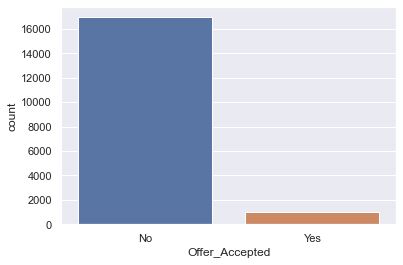

In [9]:
sns.set_theme(style="darkgrid")
sns.countplot(data = df, x= "Offer_Accepted");

In [10]:
df.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Number,17975.0,9000.227816,5196.669952,2.00,4499.5,9001.0,13501.500,18000.00
Bank_Accounts_Open,17975.0,1.255744,0.472414,1.00,1.0,1.0,1.000,3.00
Credit_Cards_Held,17975.0,1.903421,0.797108,1.00,1.0,2.0,2.000,4.00
Homes_Owned,17975.0,1.203561,0.427455,1.00,1.0,1.0,1.000,3.00
Household_Size,17975.0,3.499082,1.114501,1.00,3.0,3.0,4.000,9.00
Q1,17975.0,940.503310,350.303729,48.25,787.5,1007.0,1153.125,3366.25
Q2,17975.0,910.408456,620.068494,0.00,392.5,772.0,1521.000,3450.00
Q3,17975.0,999.398999,457.414081,0.00,663.0,1032.0,1342.000,3421.00
Q4,17975.0,1042.030654,553.467854,0.00,633.0,945.0,1463.000,3823.00
Balance,17975.0,810.175132,559.015084,0.00,363.0,703.0,1212.000,4215.00


In [11]:
columnas_numeric=df.columns[12:17]

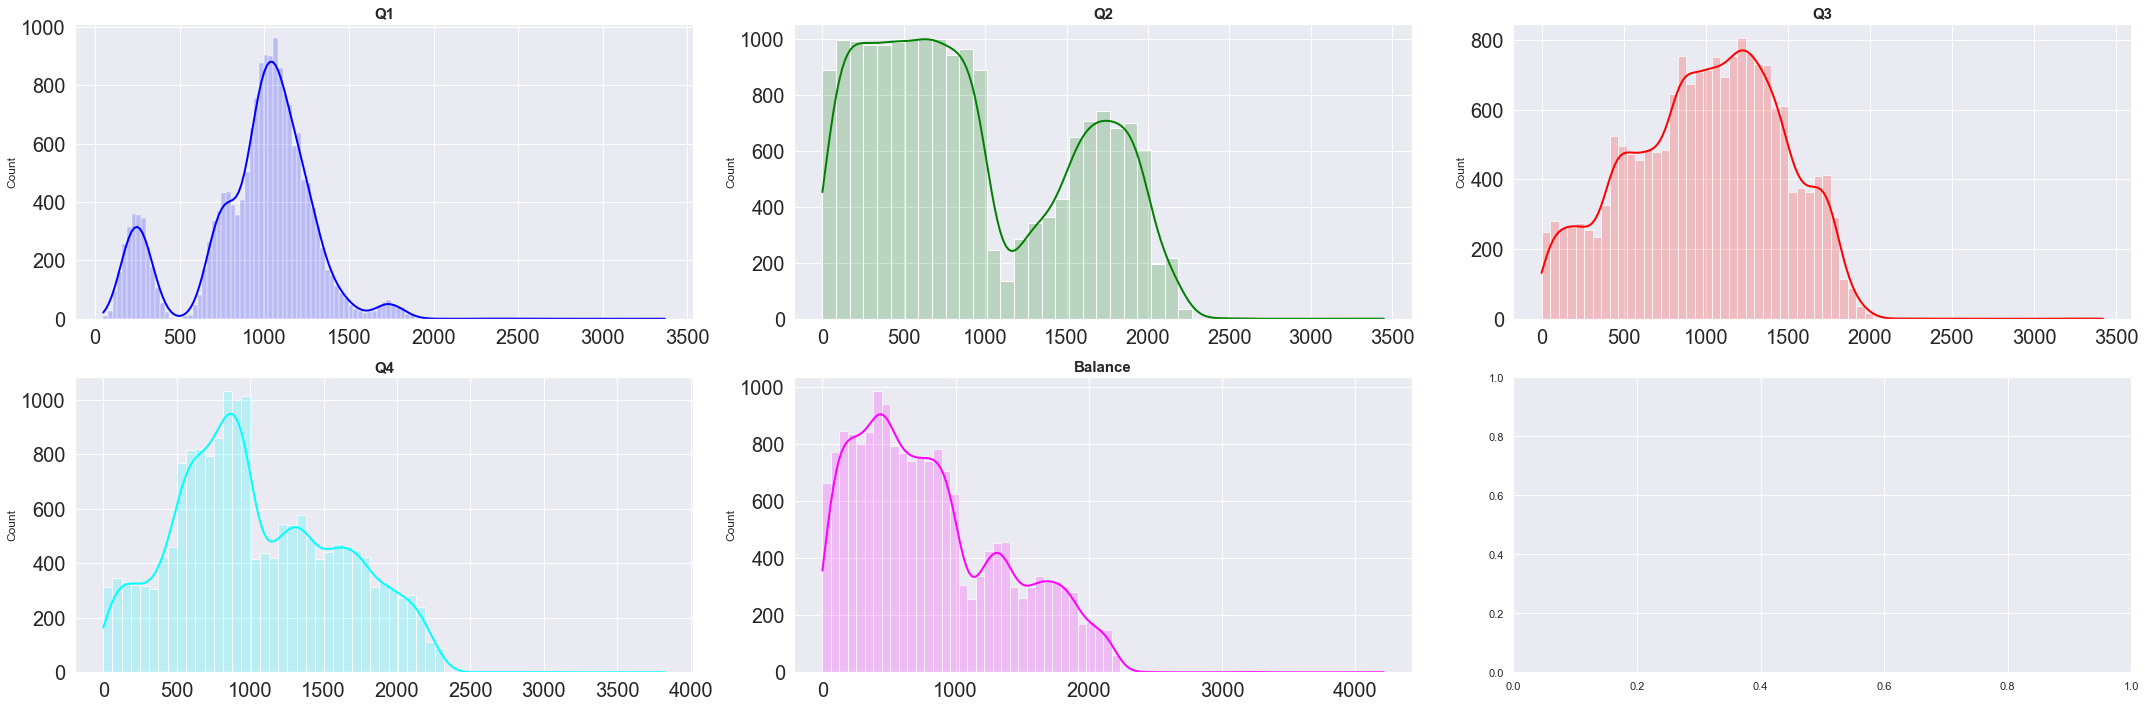

In [12]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

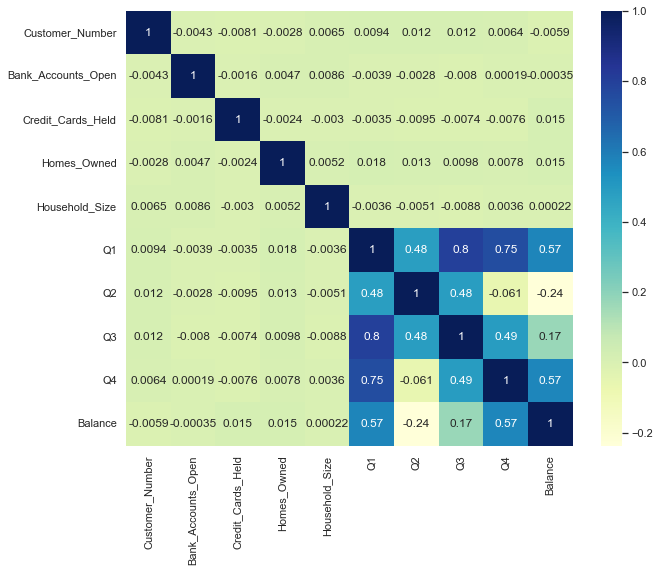

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
           annot = True);

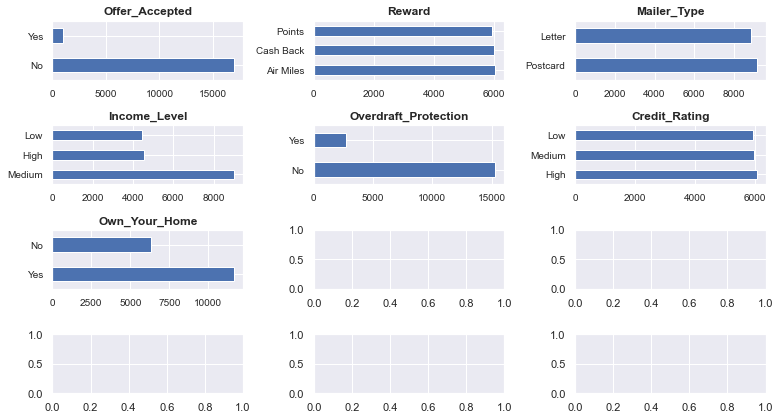

In [15]:
fig, axes = plt.subplots(4, 3, figsize = (11,6))

axes = axes.flat

columnas_object = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
fig.tight_layout();

In [16]:
df.select_dtypes(include = "object").columns

Index(['Offer_Accepted', 'Reward', 'Mailer_Type', 'Income_Level',
       'Overdraft_Protection', 'Credit_Rating', 'Own_Your_Home'],
      dtype='object')

In [17]:
df.select_dtypes(include="object").columns[1:]

Index(['Reward', 'Mailer_Type', 'Income_Level', 'Overdraft_Protection',
       'Credit_Rating', 'Own_Your_Home'],
      dtype='object')

## Outliers

In [19]:
df_numericas=df[columnas_numeric]

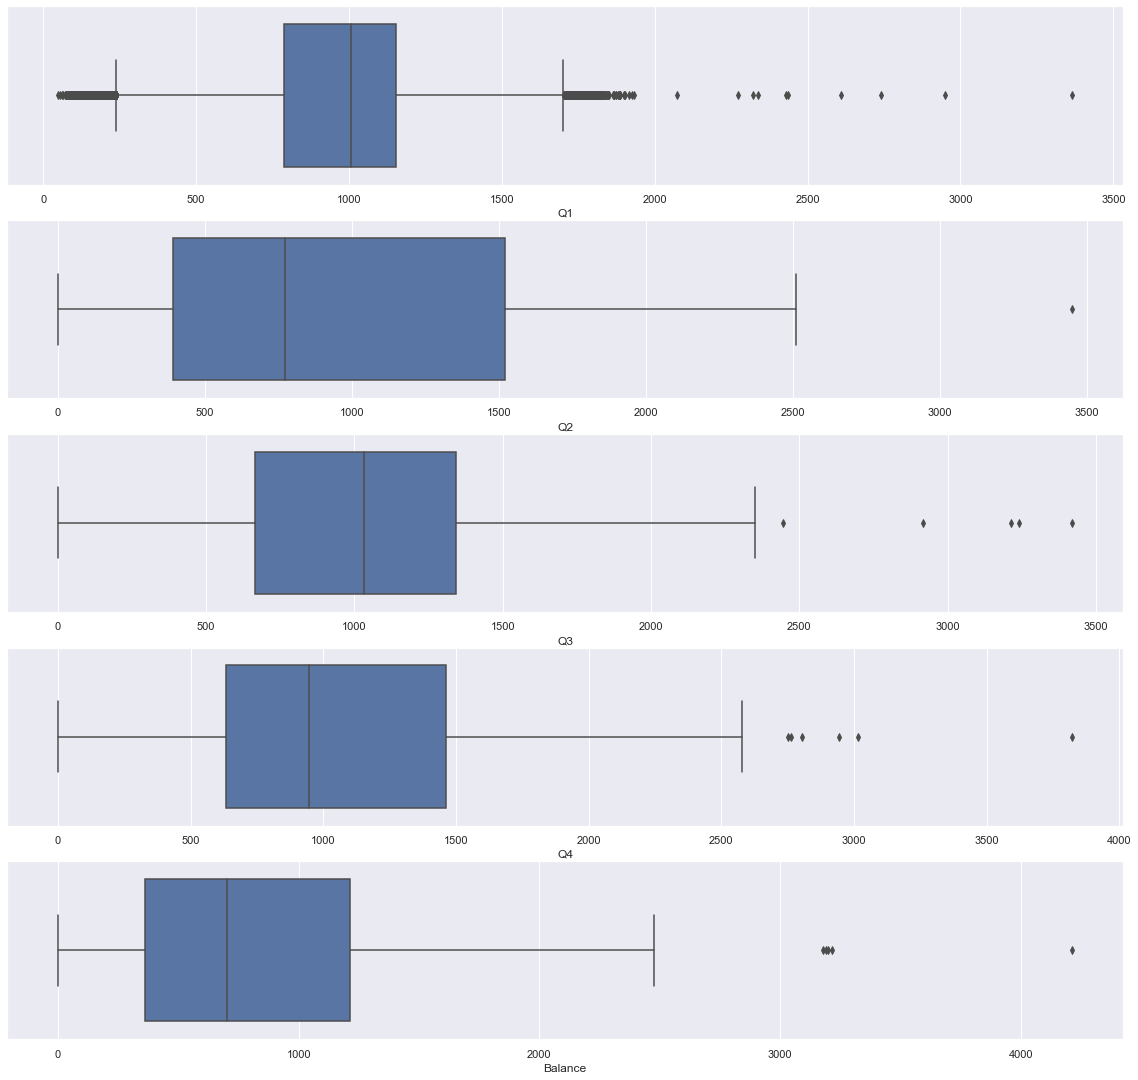

In [20]:
fig, ax = plt.subplots(5, 1, figsize=(20,19))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

In [21]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [22]:
detectar_outliers=detectar_outliers(columnas_numeric,df)

In [23]:
for k, v in detectar_outliers.items():
        mediana = df[k].median() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
        for i in v: # iteremos por la lista de valores para cada columna
            df.loc[i,k] = mediana 

In [27]:
df_numericas=df[columnas_numeric]

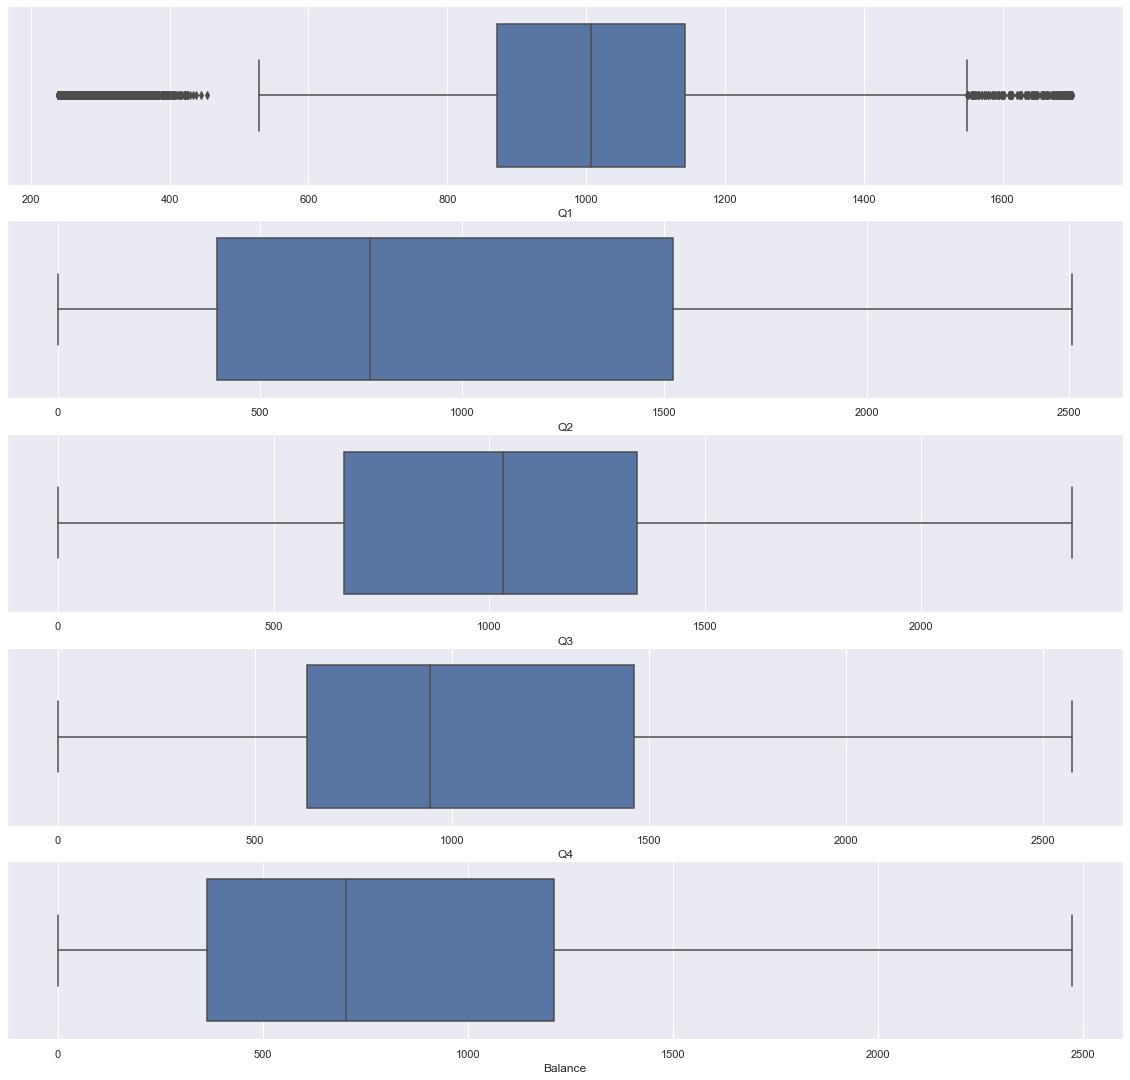

In [28]:
fig, ax = plt.subplots(5, 1, figsize=(20,19))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

## Estandarización

In [54]:
df.select_dtypes(include=np.number).columns[5:10]

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Balance'], dtype='object')

In [55]:
scaler = StandardScaler()

In [56]:
scaler.fit(df[['Q1', 'Q2', 'Q3', 'Q4', 'Balance']])
X_escaladas = scaler.transform(df[['Q1', 'Q2', 'Q3', 'Q4', 'Balance']])
df[['Q1', 'Q2', 'Q3', 'Q4', 'Balance']] = X_escaladas
df.head()

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Q1,Q2,Q3,Q4,Balance
0,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,0.094270,-1.405795,-1.957600,-1.744434,-0.795683
1,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,-2.622580,-0.876560,-1.418230,-1.623109,-1.018189
2,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,0.882733,1.077413,1.668891,0.140629,-0.700579
3,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,0.852979,1.984212,0.785290,-0.107453,-0.797477
4,6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,0.495010,1.511450,0.802831,-0.527563,-0.560616


In [ ]:
with open('estandarizacion.pkl', 'rb') as estandarizacion:
    estandarizacion = pickle.load(estandarizacion)

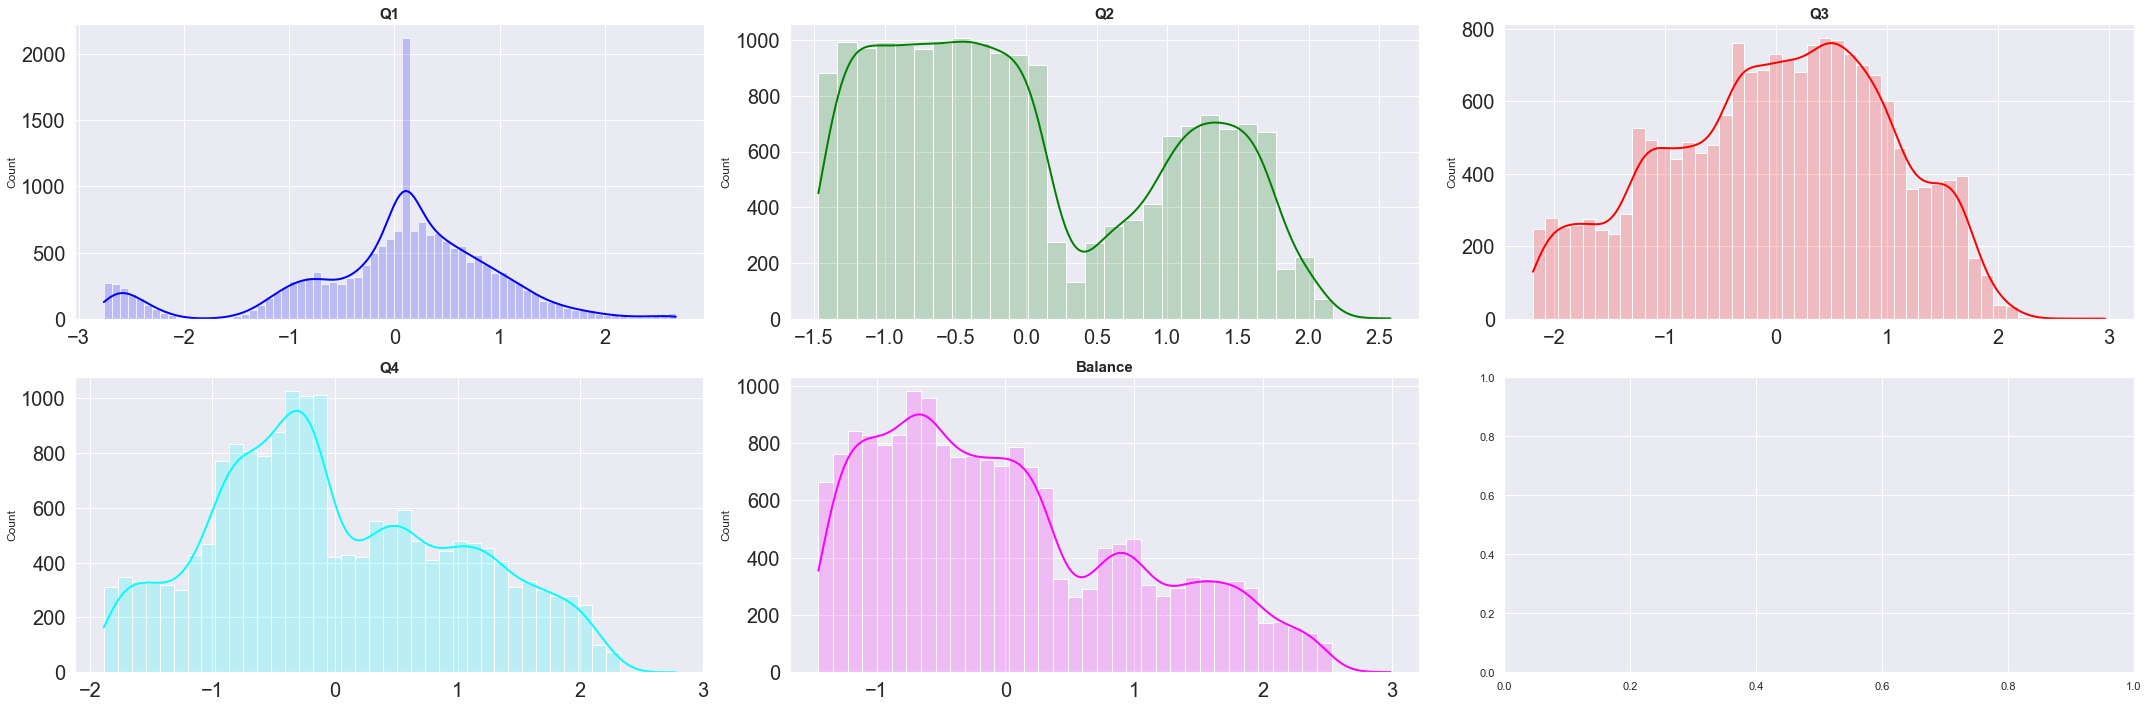

In [57]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

In [66]:
df_num_desc = df.select_dtypes(include=np.number).describe().T
df_num_desc.iloc[-5:, :] #lo estandariza una media al rededor de 0 y una std de 1

,count,mean,std,min,25%,50%,75%,max
Q1,17975.0,1.197620e-16,1.000028,-2.761119,-0.406888,0.094270,0.599146,2.674440
Q2,17975.0,-9.669904e-17,1.000028,-1.468723,-0.835416,-0.223085,0.985443,2.579601
Q3,17975.0,9.441991e-17,1.000028,-2.190011,-0.736345,0.072709,0.752402,2.964693
Q4,17975.0,-2.036757e-16,1.000028,-1.885677,-0.739429,-0.174453,0.761741,2.778993
Balance,17975.0,1.643562e-17,1.000028,-1.452434,-0.801066,-0.190969,0.720588,2.988713


## Encoding

In [31]:
df.columns

Index(['Customer_Number', 'Offer_Accepted', 'Reward', 'Mailer_Type',
       'Income_Level', 'Bank_Accounts_Open', 'Overdraft_Protection',
       'Credit_Rating', 'Credit_Cards_Held', 'Homes_Owned', 'Household_Size',
       'Own_Your_Home', 'Q1', 'Q2', 'Q3', 'Q4', 'Balance'],
      dtype='object')

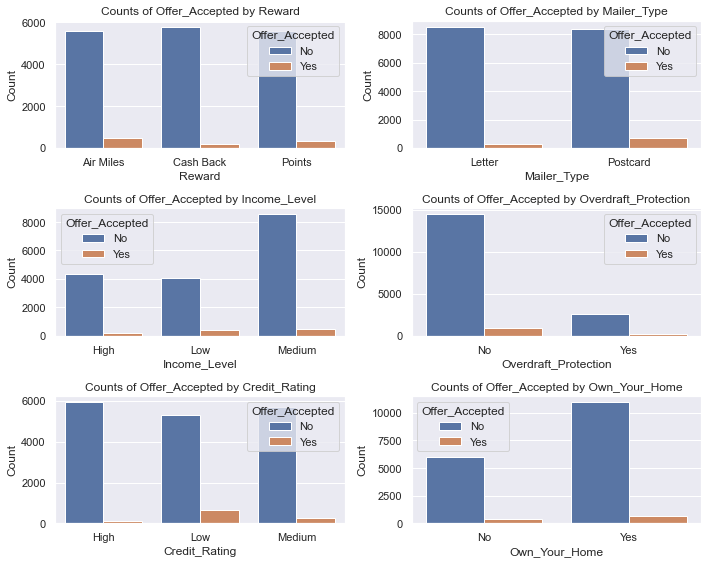

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(10, 8))
axes = axes.flat
columnas_object = df.select_dtypes(include="object").columns[1:]
for i, colum in enumerate(columnas_object):
    counts = df.groupby([colum, "Offer_Accepted"]).size().reset_index(name="count")
    sns.barplot(x=colum, y="count", hue="Offer_Accepted", data=counts, ax=axes[i])
    axes[i].set_title(f"Counts of Offer_Accepted by {colum}")
    axes[i].set_xlabel(colum)
    axes[i].set_ylabel("Count")

fig.tight_layout()
plt.show() #HABRA QUE HACER BALANCEO

In [76]:
df2 = df.copy()

In [77]:
from sklearn.preprocessing import OrdinalEncoder 

In [79]:
def ordinal_encoder(orden, df, columna):
    ordinal = OrdinalEncoder(categories = [orden], dtype = int)
    transformados_oe = ordinal.fit_transform(df[[columna]])
    df[columna] = transformados_oe

    return df

In [74]:
columnas_object = df.select_dtypes(include="object").columns[1:]
for i in columnas_object:
    print(f"{i} : {df[i].unique()}")


Reward : ['Air Miles' 'Cash Back' 'Points']
Mailer_Type : ['Letter' 'Postcard']
Income_Level : ['Medium' 'High' 'Low']
Overdraft_Protection : ['No' 'Yes']
Credit_Rating : ['Medium' 'High' 'Low']
Own_Your_Home : ['Yes' 'No']


In [75]:
orden_reward = ['Cash Back','Points','Air Miles'] 
orden_mailer = ['Postcard', 'Letter' ]
orden_income = ['Low','Medium','High']
orden_overdraft = ["No", "Yes"]
orden_creditrating = ['Low','Medium','High']
orden_ownhome = ["No","Yes"]

In [80]:
df = ordinal_encoder(orden_reward, df2, "Reward")
df = ordinal_encoder(orden_mailer, df2, "Mailer_Type")
df = ordinal_encoder(orden_income, df2, "Income_Level")
df = ordinal_encoder(orden_overdraft, df, "Overdraft_Protection")
df = ordinal_encoder(orden_creditrating, df, "Credit_Rating")
df = ordinal_encoder(orden_ownhome, df, "Own_Your_Home")

In [82]:
orden_offer = ["No","Yes"] #No es 0 y Yes es 1

In [84]:
df = ordinal_encoder(orden_offer, df2, "Offer_Accepted")

In [85]:
df.head()

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Q1,Q2,Q3,Q4,Balance
0,2,0,2,1,1,1,0,1,2,2,5,1,0.094270,-1.405795,-1.957600,-1.744434,-0.795683
1,3,0,2,0,2,2,0,1,2,1,2,1,-2.622580,-0.876560,-1.418230,-1.623109,-1.018189
2,4,0,2,1,1,2,0,2,1,1,4,0,0.882733,1.077413,1.668891,0.140629,-0.700579
3,5,0,2,1,1,1,0,1,2,1,6,1,0.852979,1.984212,0.785290,-0.107453,-0.797477
4,6,0,2,1,1,1,0,2,3,1,4,0,0.495010,1.511450,0.802831,-0.527563,-0.560616


## Balanceo de datos

In [183]:
df['Offer_Accepted'].value_counts() #0 siendo NO y 1 siendo SI

0    16954
1     1021
Name: Offer_Accepted, dtype: int64

In [104]:
from sklearn.utils import resample

In [184]:
df3=df.copy()

In [248]:
df_majority = df3[df3['Offer_Accepted']==0]
df_minority = df3[df3['Offer_Accepted']==1]

In [265]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    
                                 n_samples=3000,     
                                 random_state=42)
df_majority_downsampled = resample(df_majority, 
                                   replace=False,
                                   n_samples=3000,    
                                   random_state=42) 
data_balanced = pd.concat([df_majority_downsampled, df_minority_upsampled])

In [266]:
data_balanced['Offer_Accepted'].value_counts()

0    3000
1    3000
Name: Offer_Accepted, dtype: int64

In [180]:
df3.drop("Customer_Number", axis=1, inplace=True)

In [159]:
data_balanced = data_balanced.reset_index(drop=True)

In [186]:
X = df3.drop('Offer_Accepted', axis=1)
y = df3['Offer_Accepted']

In [190]:
upp = RandomOverSampler()
X_upp, y_upp = upp.fit_resample(X, y)
df_upp = pd.DataFrame(X_upp, columns=X.columns)
df_upp['Offer_Accepted'] = y_upp

In [191]:
df_upp['Offer_Accepted'].value_counts()

0    16954
1    16954
Name: Offer_Accepted, dtype: int64

In [192]:
undersampler = RandomUnderSampler(random_state=42)
X_down, y_down = undersampler.fit_resample(X, y)
df_down = pd.DataFrame(X_down, columns=X.columns)
df_down['Offer_Accepted'] = y_down

In [193]:
df_down['Offer_Accepted'].value_counts()

0    1021
1    1021
Name: Offer_Accepted, dtype: int64

## Ajuste de modelo 

In [267]:
#opcion1 balanceo -la que voy a utilizar
X = data_balanced.drop(["Customer_Number","Offer_Accepted"], axis = 1) #customer number tampoco me interesa
y = data_balanced["Offer_Accepted"]

In [205]:
#opcion2 down
X = df_down.drop("Offer_Accepted", axis = 1) #customer number tampoco me interesa
y = df_down["Offer_Accepted"]

In [215]:
#opcion 3 upp
X = df_upp.drop("Offer_Accepted", axis = 1) #customer number tampoco me interesa
y = df_upp["Offer_Accepted"]

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8)

In [269]:
y_test.value_counts()

1    622
0    578
Name: Offer_Accepted, dtype: int64

In [270]:
y_train.value_counts()

0    2422
1    2378
Name: Offer_Accepted, dtype: int64

In [271]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [272]:
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

In [229]:
def matriz_confusion(clases_reales, clases_predichas, total_filas_test):
    mat_lr = confusion_matrix(clases_reales, clases_predichas)
    df = pd.DataFrame(mat_lr, columns = ["No Oferta", "Si oferta"], index = ["No oferta", "Si oferta"])
    return df

In [273]:
matriz_logistica = matriz_confusion(y_test, y_pred_test, y_test.shape[0])
matriz_logistica

,No Oferta,Si oferta
No oferta,403,175
Si oferta,167,455


In [213]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [274]:
# con data_balance
results_logistic = metricas(y_test, y_pred_test, y_train, y_pred_train, "Regresión logistica")
results_logistic

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.715000,0.722222,0.731511,0.726837,0.428953,test,Regresión logistica
1,0.690208,0.682957,0.699327,0.691045,0.380499,train,Regresión logistica


## Decision tree

In [275]:
arbol = DecisionTreeClassifier()
arbol.fit(X_train, y_train)

DecisionTreeClassifier()

In [277]:
y_pred_train_dt = arbol.predict(X_train)
y_pred_test_dt = arbol.predict(X_test)

In [278]:
results_decission_tree1 = metricas(y_test, y_pred_test_dt,y_train, y_pred_train_dt, "Decission Tree I" )
results_decission_tree1 #OVERFITING SE LO HA APRENDIDO DE MEMORIA

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.865833,0.827881,0.935691,0.878491,0.729967,test,Decission Tree I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree I


In [276]:
max_features = np.sqrt(len(X_train.columns)) #MAX features
max_features

3.872983346207417

In [279]:
# veamos cual es la profundidad de nuestro árbol
print(arbol.tree_.max_depth)

23


In [315]:
param = {"max_depth": [1,2,3,4,5,6,7,8,9,10,11],
         "min_samples_split": [30, 50, 70, 90, 110],
         "max_features": [1,2,3,4],
         "min_samples_leaf": [30, 50, 70, 90, 110]}
arbol2 = GridSearchCV(
        estimator = DecisionTreeClassifier(), 
        param_grid = param, 
        n_jobs=-1,
        verbose = 1, 
        cv = 10, 
        return_train_score = True, 
        scoring = "neg_mean_squared_error")

In [316]:
%%time
arbol2.fit(X_train, y_train)

Fitting 10 folds for each of 1100 candidates, totalling 11000 fits
CPU times: total: 9.09 s
Wall time: 1min 9s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [30, 50, 70, 90, 110],
                         'min_samples_split': [30, 50, 70, 90, 110]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [317]:
arbol2.best_params_

{'max_depth': 9,
 'max_features': 4,
 'min_samples_leaf': 30,
 'min_samples_split': 50}

In [318]:
arbol3 = DecisionTreeClassifier( max_depth = 9, max_features=4,min_samples_leaf=30, min_samples_split=50)
arbol3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9, max_features=4, min_samples_leaf=30,
                       min_samples_split=50)

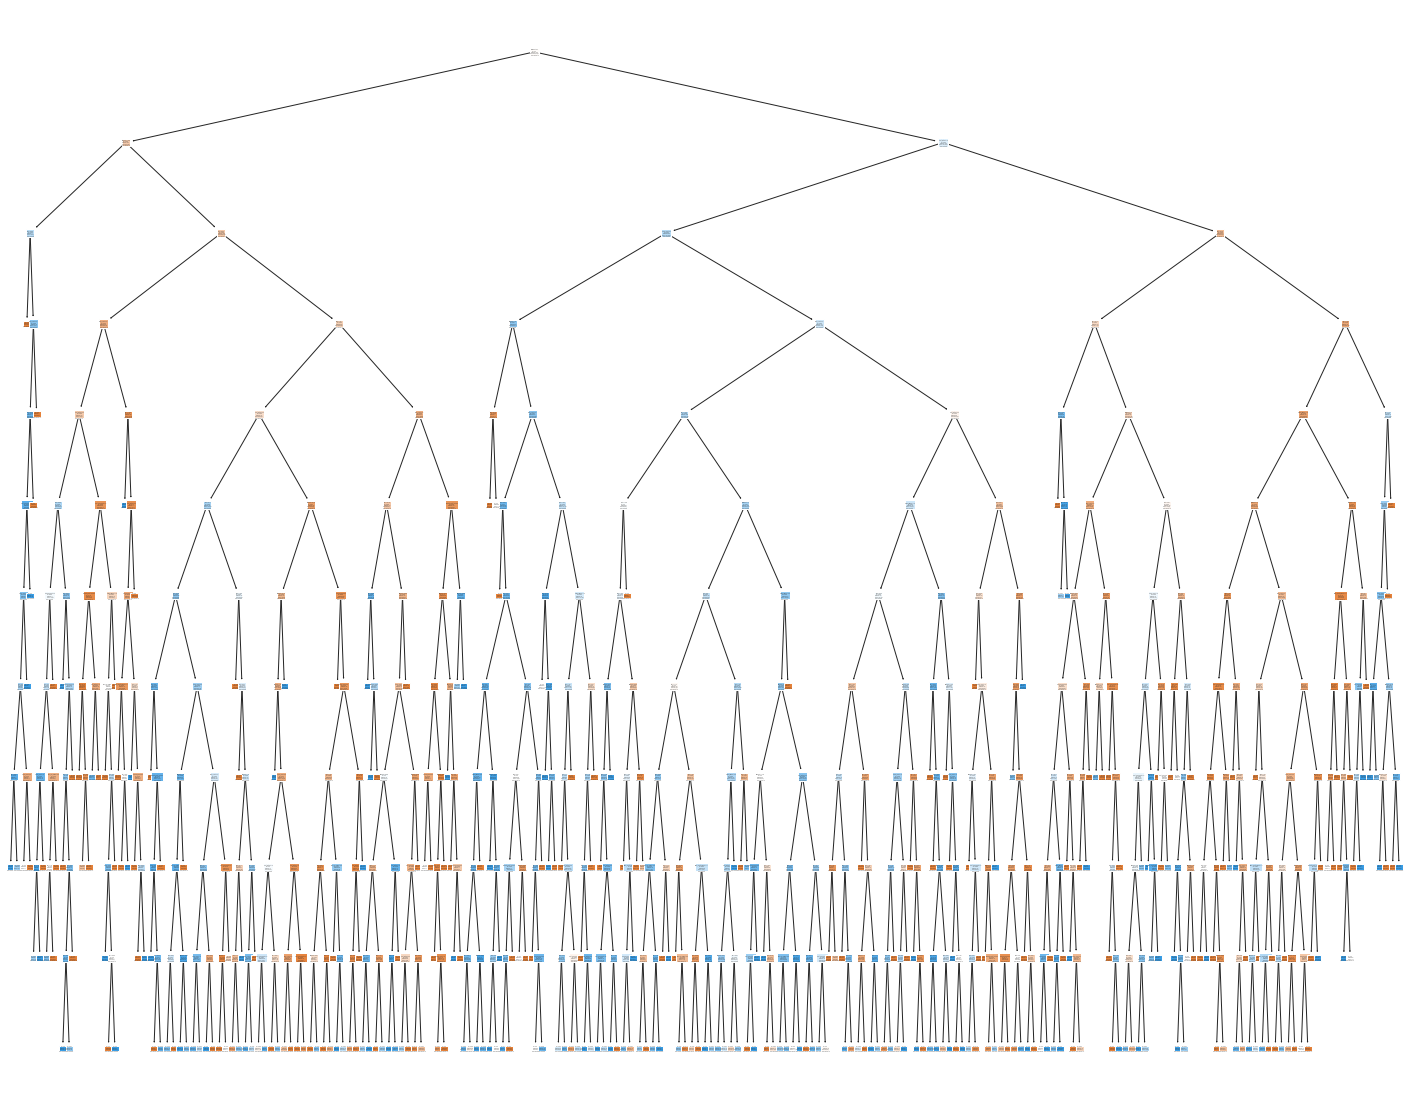

In [307]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(arbol3,
                   feature_names=X.columns,
                   class_names=["No Oferta", "Si oferta"],
                   filled=True)
plt.show()

In [319]:
y_pred_arbol_test= arbol3.predict(X_test)
y_pred_arbol_train= arbol3.predict(X_train)

In [320]:
matriz_arbol = matriz_confusion(y_test, y_pred_arbol_test, y_test.shape[0])
matriz_arbol

,No Oferta,Si oferta
No oferta,379,199
Si oferta,177,445


In [321]:
results_decission_tree2 =  metricas(y_test, y_pred_arbol_test, y_train, y_pred_arbol_train, "Decission Tree II")
results_decission_tree2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.686667,0.690994,0.715434,0.703002,0.371644,test,Decission Tree II
1,0.718333,0.709046,0.731707,0.720199,0.436783,train,Decission Tree II


In [322]:
df_all_results = pd.concat([results_logistic, results_decission_tree2], axis = 0)
df_all_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.715000,0.722222,0.731511,0.726837,0.428953,test,Regresión logistica
1,0.690208,0.682957,0.699327,0.691045,0.380499,train,Regresión logistica
0,0.686667,0.690994,0.715434,0.703002,0.371644,test,Decission Tree II
1,0.718333,0.709046,0.731707,0.720199,0.436783,train,Decission Tree II


## Random Forest

In [323]:
bosque = GridSearchCV(
        estimator = RandomForestClassifier(), 
        param_grid = param, 
        n_jobs=-1,
        verbose = 1, 
        cv = 10)
bosque.fit(X_train, y_train)

Fitting 10 folds for each of 1100 candidates, totalling 11000 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [30, 50, 70, 90, 110],
                         'min_samples_split': [30, 50, 70, 90, 110]},
             verbose=1)

In [325]:
bosque.best_params_

{'max_depth': 11,
 'max_features': 1,
 'min_samples_leaf': 30,
 'min_samples_split': 30}

In [327]:
clf=RandomForestClassifier(max_depth= 11,
 max_features= 1,
 min_samples_leaf= 30,
 min_samples_split= 30)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=11, max_features=1, min_samples_leaf=30,
                       min_samples_split=30)

In [328]:
y_pred_clf_test= clf.predict(X_test)
y_pred_clf_train= clf.predict(X_train)

In [329]:
matriz_random = matriz_confusion(y_test, y_pred_clf_test, y_test.shape[0])
matriz_random

,No Oferta,Si oferta
No oferta,421,157
Si oferta,132,490


In [330]:
results_forest = metricas(y_test, y_pred_clf_test, y_train, y_pred_clf_train, "Random Forest")
df_all_results = pd.concat([df_all_results, results_forest], axis = 0)
df_all_results #hemos mejoraooo

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.715000,0.722222,0.731511,0.726837,0.428953,test,Regresión logistica
1,0.690208,0.682957,0.699327,0.691045,0.380499,train,Regresión logistica
0,0.686667,0.690994,0.715434,0.703002,0.371644,test,Decission Tree II
1,0.718333,0.709046,0.731707,0.720199,0.436783,train,Decission Tree II
0,0.759167,0.757342,0.787781,0.772262,0.516946,test,Random Forest
1,0.785625,0.766706,0.815391,0.790300,0.571461,train,Random Forest


## Gradient

In [331]:
grid = GridSearchCV(
        estimator  = GradientBoostingClassifier(),
        param_grid = param,
        n_jobs     = -1,
        verbose    = 1,
        cv         = 10, 
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

Fitting 10 folds for each of 1100 candidates, totalling 11000 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [30, 50, 70, 90, 110],
                         'min_samples_split': [30, 50, 70, 90, 110]},
             return_train_score=True, verbose=1)

In [332]:
grid.best_params_

{'max_depth': 11,
 'max_features': 4,
 'min_samples_leaf': 30,
 'min_samples_split': 30}

In [333]:
y_pred_gb_test= grid.predict(X_test)
y_pred_gb_train= grid.predict(X_train)

In [334]:
results_gradient = metricas(y_test, y_pred_gb_test, y_train, y_pred_gb_train, "Gradient")
df_all_results = pd.concat([df_all_results, results_gradient], axis = 0)
df_all_results #aunque es verdad que esta bastante overfit

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.715000,0.722222,0.731511,0.726837,0.428953,test,Regresión logistica
1,0.690208,0.682957,0.699327,0.691045,0.380499,train,Regresión logistica
0,0.686667,0.690994,0.715434,0.703002,0.371644,test,Decission Tree II
1,0.718333,0.709046,0.731707,0.720199,0.436783,train,Decission Tree II
0,0.759167,0.757342,0.787781,0.772262,0.516946,test,Random Forest
1,0.785625,0.766706,0.815391,0.790300,0.571461,train,Random Forest
0,0.845833,0.817126,0.905145,0.858886,0.689981,test,Gradient
1,0.972500,0.959869,0.985702,0.972614,0.945009,train,Gradient


## KNN KNeighborsClassifier

In [336]:
from sklearn import metrics

In [344]:
knn_scores = []

for k in range(1,21):
    # por defecto nos devuelve la precisión
    score=cross_val_score(KNeighborsClassifier(n_neighbors = k),
                          X = X,
                          y = y,
                          cv=10, 
                         scoring = "accuracy")
    knn_scores.append(score.mean())

In [345]:
knn_scores

[0.8605,
 0.8181666666666667,
 0.7743333333333334,
 0.7431666666666665,
 0.7245,
 0.7201666666666667,
 0.7111666666666667,
 0.7015,
 0.6975,
 0.6960000000000001,
 0.6903333333333335,
 0.6861666666666667,
 0.6833333333333333,
 0.6843333333333333,
 0.6823333333333333,
 0.6811666666666667,
 0.6799999999999999,
 0.6813333333333335,
 0.6776666666666666,
 0.68]

In [342]:
knn = pd.DataFrame(knn_scores, range(1,21)).reset_index()
knn.columns = ["number_neighbors", "score"]
knn #tiene pinta de que el KNN no es un buen modelo porque no tiene sentido que el mas accurate sea el de un vecino

,number_neighbors,score
0,1,0.860500
1,2,0.818167
2,3,0.774333
3,4,0.743167
4,5,0.724500
5,6,0.720167
6,7,0.711167
7,8,0.701500
8,9,0.697500
9,10,0.696000


In [351]:
# guardamos el mejor modelo que en este caso era gr
import pickle
with open('mejor_modelo.pkl', 'wb') as modelo:
        pickle.dump(grid, modelo) 

El mejor modelo sería el gradient aun que es verdad que igual esta un poco overfit. Podria haber hecho el balanceo utilizando un valor mas alto!